# Stocks

In [97]:
top_6_stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NFLX"]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

## API

### Eodhistoricaldata

https://eodhistoricaldata.com/api/news?api_token=OeAFFmMliFG5orCUuwAKQ8l4WWFQ67YX&from=2018-03-01&to=2018-03-30&offset=0

In [10]:
url= "https://eodhistoricaldata.com/api/news?api_token=EOD_API_KEY&s=TSLA&from=2020-01-01&to=2020-01-15&offset=0&limit=100"
r = requests.get(url)
data = r.json()

news= []
for _ in range(0,len(data)):
    news_ = data[_]["content"]
    date_ =data[_]["date"] 
    news.append(f"{date_} : {news_}")
    

len(news)

1

In [12]:
!pip install termcolor

In [15]:
port requests
from termcolor import colored as cl
api_key = EOD_API_KEY

In [16]:
news = pd.DataFrame(columns=["date", "title", "content"])
news

,date,title,content


In [146]:
def get_stock_news(stock, api_key, from_date, to_date, limit=1000):
    url = f'https://eodhistoricaldata.com/api/news?api_token={api_key}&s={stock}&from={from_date}&to={to_date}&limit={limit}'
    news_json = requests.get(url).json()
    for i in range(len(news_json)):
        news.loc[i] = [news_json[i]["date"],news_json[i]["title"], news_json[i]["content"]] 
    return news

In [98]:
top_6_stocks

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX']

In [154]:
import pandas as pd

def get_stocks_out(stock_name, api_key):
    start_date = ["2020-11-01","2020-11-15","2020-12-01", "2020-12-15",  "2021-01-01","2021-01-15", "2021-02-01", "2021-02-15","2021-03-01","2021-03-15", "2021-04-01","2021-04-15", "2021-05-01","2021-05-15","2021-06-01" ,"2021-06-15" ,"2021-07-01","2021-07-15",  "2021-08-01","2021-08-15",  "2021-09-01","2021-09-15", "2021-10-01", "2021-10-15", "2021-11-01", "2021-11-15"]
    end_date = ["2020-11-14","2020-11-30","2020-12-14","2020-12-31",  "2021-01-14",  "2021-01-31", "2021-02-14", "2021-02-28", "2021-03-14","2021-03-31", "2021-04-14","2021-04-30","2021-05-14","2021-05-31",  "2021-06-14" ,"2021-06-30" ,"2021-07-14","2021-07-31", "2021-08-14","2021-08-31","2021-09-14","2021-09-30",  "2021-10-14","2021-10-31", "2022-11-14", "2022-11-23"]

    news = pd.DataFrame(columns=["date", "title", "content"])
    news_result = 0
    for i in range(len(start_date)):
        news = news.append(get_stock_news(stock_name, api_key,start_date[i],end_date[i],1000), ignore_index=True)
    return news

  

In [155]:
#get out all news by stockname
df_list = []
for stock in top_6_stocks:
    df = pd.DataFrame(get_stocks_out(stock, api_key))
    df["ticker"]= stock
    df = df.drop_duplicates()
    df_list.append(df)


In [116]:
top_6_stocks

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NFLX']

In [168]:
# concat the dataframes
df_news = df_list[0].append(df_list[1])
df_news = df_news.append(df_list[2])
df_news = df_news.append(df_list[3])
df_news = df_news.append(df_list[4])
df_news = df_news.append(df_list[5])
len(df_news)

33595

In [192]:
len(df_news)

33595

In [171]:
#save the result in a csv file
df_news.to_csv("stock_news_top_6_stocks")

In [175]:
import datetime
NFLX_news["date_day"] = pd.to_datetime(NFLX_news["date"],format = "%Y-%m-%dT%H:%M:%S+00:00").dt.date
NFLX_news["date_day"] 

4        2020-11-09
6        2020-11-09
3        2020-11-12
1        2020-11-13
5        2020-11-14
            ...    
3119     2021-11-23
119      2021-11-23
12119    2021-11-23
1119     2021-11-23
2119     2021-11-23
Name: date_day, Length: 13000, dtype: object

In [185]:
df_news["date"] = pd.to_datetime(df_news["date"], format ="%Y-%m-%dT%H:%M:%S+00:00")
df_news["date_days"] = df_news["date"].dt.date

In [186]:
df_news["date_days"]

0        2020-11-10
1        2020-11-13
2        2020-11-09
3        2020-11-03
4        2020-11-11
            ...    
24114    2021-11-22
24115    2021-11-22
24116    2021-11-22
24118    2021-11-22
24119    2021-11-23
Name: date_days, Length: 33595, dtype: object

ValueError: `bins` must increase monotonically, when an array

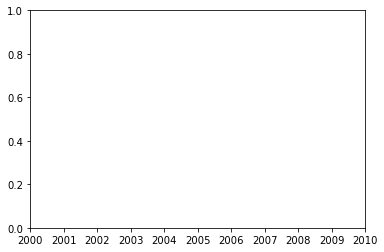

In [189]:
plt.hist(df_news["date_days"].unique(), df_news["date_days"].value_counts())

In [102]:
for stock in top_6_stocks:
    df = f"{stock}_news"
    df["date_day"] = pd.to_datetime(df["date"],format = "%Y-%m-%dT%H:%M:%S+00:00").dt.date
NFLX_news["date_day"]

TypeError: string indices must be integers

In [ ]:
def get_customized_news(stock, start_date, end_date, n_news, api_key, offset = 0):
    url = f'https://eodhistoricaldata.com/api/news?api_token={api_key}&s={stock}&limit={n_news}&offset={offset}&from={start_date}&to={end_date}'
    news_json = requests.get(url).json()
    
    news = []
    
    for i in range(len(news_json)):
        title = news_json[-i]['title']
        news.append(title)
        print(cl('{}. '.format(i+1), attrs = ['bold']), '{}'.format(title))
    
    return news

#tsla_news = get_customized_news('AMZN', '2021-01-01', '2021-06-30',1000, api_key, 0)

In [ ]:
#concat all dfs 

### Twitter Academic API

In [ ]:
from TwitterAPI import TwitterAPI
SEARCH_TERM = '#AAPL OR #FB OR #KO OR #ABT OR #PEPCO'
PRODUCT = 'fullarchive'
LABEL = 'your label'
api = TwitterAPI(API_KEY, 'consumer secret', 'access token key', 'access token secret')
r = api.request('tweets/search/%s/:%s' % (PRODUCT, LABEL), {'query':SEARCH_TERM})
for item in r:
    if 'text' in item:
        print(item['text'])
        print(item['user']['name'])
        print(item['followers_count'])
        print(item['user']['location'])
        print(item['user']['verified'])
        print(item['lang'])
        print(item['user']['statuses_count'])
        print(item['source'])
        print(item['favorite_count'])
        print(item['retweet_count'])
        print(item['created_at'])

In [ ]:
r = api.request('tweets/search/%s/:%s' % (PRODUCT, LABEL), 
                {'query':SEARCH_TERM, 'fromDate':201501010000, 'toDate':201812310000})

In [ ]:
search_headers = {
    'Authorization': 'BEARER_API_KEY'   
}

search_params = {
    'q': 'AAPL',
    'created_at': '2020-06-11',
#     'result_type': 'mixed'
}

# search_url = "https://api.twitter.com/2/tweets/search/all"

search_url = 'https://api.twitter.com/1.1/search/tweets.json'  
search_resp = requests.get(search_url, headers=search_headers, params=search_params)


In [ ]:
results = search_resp.json()

In [ ]:
results

In [ ]:
len(results["statuses"])